In [1]:
import numpy as np
import pandas as pd 
import os
import random
from tqdm import tqdm
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from scipy.stats import mannwhitneyu
import glob
init_notebook_mode(connected=True) ## plotly init
seed = 123
random.seed = seed

In [2]:
# Import the tools and libraries

# Regular EDA(exploratory data analysis) and plotting libraries
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Models from Sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

# Model evaluation
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

from sklearn.decomposition import PCA

In [3]:
import datetime

In [4]:
start=datetime.datetime.now()

In [30]:
# Put the models in a Python dictionary
models = {
          'Logistic Regression': LogisticRegression(),
          'KNN': KNeighborsClassifier(),
          'Random Forest Classifier': RandomForestClassifier(),
          'Linear SVC': LinearSVC(),
          'SVC': SVC()
         }

sns.set(font_scale=1.5)

# Create a function to fit and score the models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    '''
    Fits and evaluates given machine learning models.
    models: a dict of different Sklearn models
    X_train: training data(no labels)
    X_test: testing data(no labels)
    y_train: training labels
    y_test: testing labels
    '''
    # Set up a random seed
    # Create another dictionary to store model scores
    model_scores = {}
    # Loop through the models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append to 'model_scores'
        model_scores[name] = model.score(X_test, y_test)
        plot_roc_curve(model, X_test, y_test);
        y_preds = model.predict(X_test)
        plot_conf_mat(y_test, y_preds)
        print(name.title())
        print(classification_report(y_test, y_preds))
        plt.show()
    return model_scores

def create_dict(url, idxs=range(0, 64)):
    temp_df = pd.read_csv(url)
    aux=dict({'name':list(set(temp_df['name']))[0],'trial':list(set(temp_df['trial number']))[0], 'type':list(set(temp_df['subject identifier']))[0]})
    _=[aux.update({key+'_'+str(idx):value for key, value in dict(temp_df[temp_df['channel']==idx]['sensor value'].describe()).items() if key!='count'}) for idx in idxs]
    return aux

def plot_conf_mat(y_test, y_preds):
    '''
    Plot a visual confusion matrix with Seaborn's `heatmap()` function.
    '''
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True Labels")
    plt.ylabel("Predicted Labels")
    

def plote(ary1, ary2, title=None):
    x1 = list(ary1.columns)
    y1 = list(ary1.mean().values)
    y_upper1 = list(ary1.mean().values+ary1.std().values)
    y_lower1 = list(ary1.mean().values-ary1.std().values)

    x2 = list(ary2.columns)
    y2 = list(ary2.mean().values)
    y_upper2 = list(ary2.mean().values+ary1.std().values)
    y_lower2 = list(ary2.mean().values-ary1.std().values)


    fig = go.Figure(layout=go.Layout(
        title=go.layout.Title(text=title)),
        data=[
        go.Scatter(
            name='Alcool',
            x=x1+x1[::-1], # x, then x reversed
            y=y_upper1+y_lower1[::-1], # upper, then lower reversed
            fill='toself',
            fillcolor='rgba(255,0,0,0.3)',
            line=dict(color='rgba(255,0,0,0.3)'),
            hoverinfo="skip",
            #showlegend=False
        ),

        go.Scatter(
            name='Controle',
            x=x2+x2[::-1], # x, then x reversed
            y=y_upper2+y_lower2[::-1], # upper, then lower reversed
            fill='toself',
            fillcolor='rgba(0,0,255,0.3)',
            line=dict(color='rgba(0,0,255,0.3)'),
            hoverinfo="skip",
            #showlegend=False
        ),
        go.Scatter(
            name='Alcool',
            x=x1,
            y=y1,
            line=dict(color='rgb(255,0,0)'),
            mode='lines'
        ),
        go.Scatter(
            name='Controle',
            x=x2,
            y=y2,
            line=dict(color='rgb(0,0,255)'),
            mode='lines'
        )
    ])
    fig.show()

In [31]:
EEG_data = pd.DataFrame.from_records([create_dict(url) for url in glob.glob('SMNI_CMI_*/*.csv')])

In [40]:
len(set(EEG_data['name']))

16

In [7]:
alcool=EEG_data[EEG_data['type']=='a']
control=EEG_data[EEG_data['type']=='c']

In [22]:
EEG_data[EEG_data['trial']==3]

trial type     mean_0      std_0    min_0     25%_0   50%_0     75%_0  \
50       3    c  -9.615574   6.263090  -22.685 -13.52925 -10.966  -5.10700   
89       3    c   4.648246  33.448920  -29.724 -18.00500  -5.798   8.36200   
135      3    a   0.510539  72.903802 -108.897 -70.81100  -4.161  63.71025   
137      3    c  -8.451461   8.939238  -25.574 -14.95400  -8.484  -3.60100   
153      3    a  -3.155383   7.272098  -21.556  -7.39500  -2.024   2.37000   
243      3    a  -8.771258   7.960994  -24.373 -13.26500  -9.725  -5.81900   
250      3    a   1.709004  23.807683  -19.562 -12.36000  -8.087   1.43400   
310      3    a  12.903863  11.432104  -12.838   4.74000  12.065  21.34200   
318      3    c -11.426305   8.745171  -33.712 -18.08700 -11.251  -5.39100   
399      3    c   4.730871   8.941646  -21.749  -0.87500   4.130  10.96600   
419      3    c  -0.251797  28.737804  -30.914 -14.31300  -5.524   1.31200   

       max_0     mean_1  ...  50%_62  75%_62   max_62    mean_63     std_63  \
50     5.636 -12.051234  ... -10.569  -5.076    5.544  -8.874871   8.532881   
89    99.670   3.172563  ...  -5.839   7.955   98.165  -5.730344  10.722715   
135  133.291  -1.733121  ...  -2.055   2.340   14.058  -7.596977  10.351757   
137   15.930  -6.304383  ...  -4.049   0.956   24.760 -12.760813  11.275571   
153   10.671   2.834984  ...  -5.676  -0.305   13.855  -3.533047   8.775662   
243   14.201  -6.700496  ...  -4.293   0.468   12.553 -12.293484  12.830689   
250   76.141   1.228348  ...  -6.866   1.923   68.329 -14.233879  12.558769   
310   35.502   1.464211  ...  -6.012  -2.106   10.101  16.221996  12.423084   
318    8.280  -6.729137  ...  -9.725  -4.354    9.318  -4.018164   9.198836   
399   29.521   4.573152  ...   4.964  11.800   29.378   6.757062  12.846579   
419  118.011   0.141176  ...  -5.290   1.180  116.292  -4.105246  11.878623   

     min_63    25%_63   50%_63    75%_63  max_63  
50  -29.999 -13.88500  -8.5140  -3.14300   8.087  
89  -23.478 -13.71300  -7.3650  -1.38375  28.768  
135 -29.053 -15.38100  -7.0800  -1.70900  15.869  
137 -36.082 -19.60225 -11.9120  -4.34400  13.234  
153 -27.751  -8.70800  -1.6275   3.49900   8.870  
243 -40.507 -20.60925 -10.7220  -2.42100  13.204  
250 -45.705 -21.29100 -15.6760  -4.07900   8.494  
310 -11.139   7.90400  14.0075  25.97000  40.131  
318 -33.620 -10.18300  -2.8580   2.02400  16.184  
399 -38.768  -2.14600   8.8400  16.89700  26.662  
419 -27.171 -12.03400  -6.1750   4.56700  24.587  

[11 rows x 450 columns]

In [8]:
columns=['mean_', 'std_', 'min_', '25%_', '50%_', '75%_', 'max_']

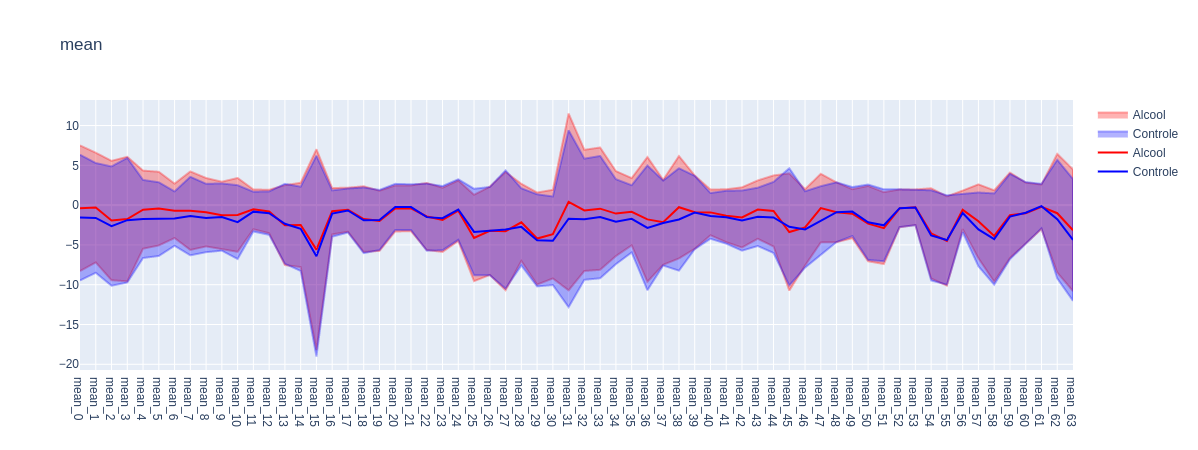

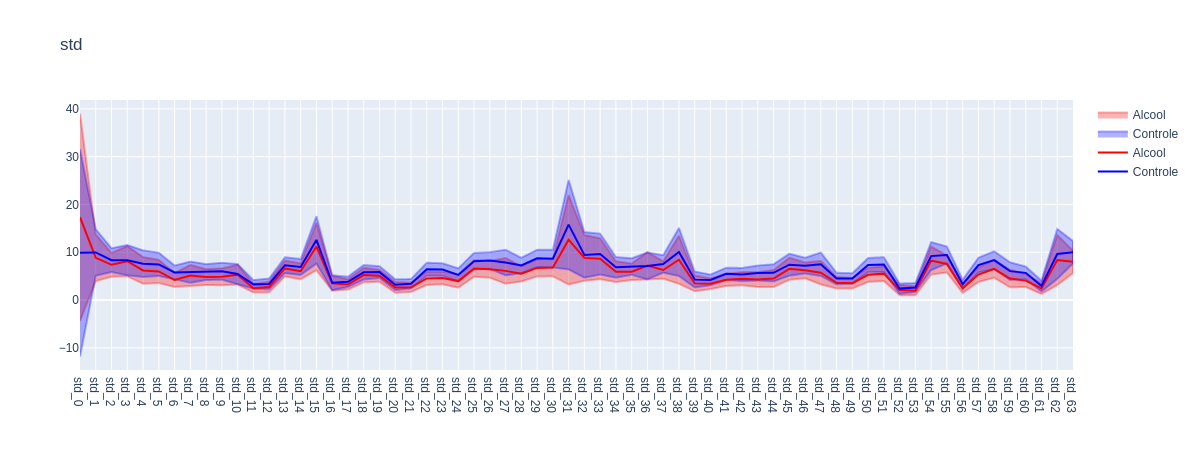

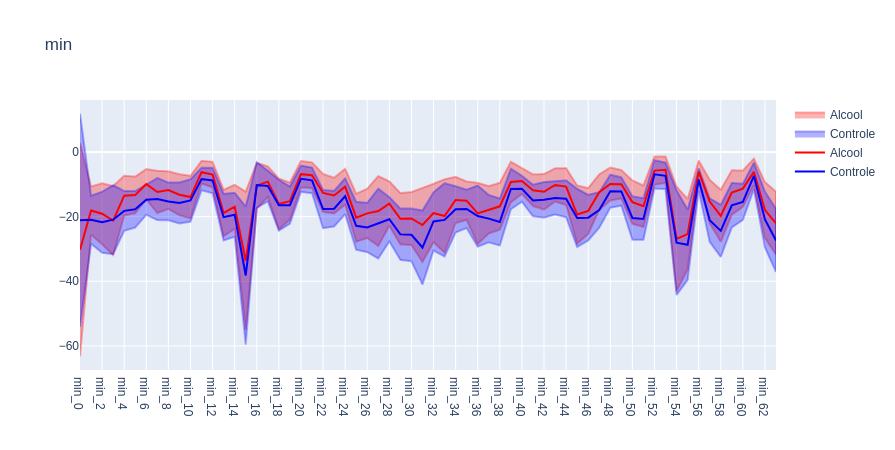

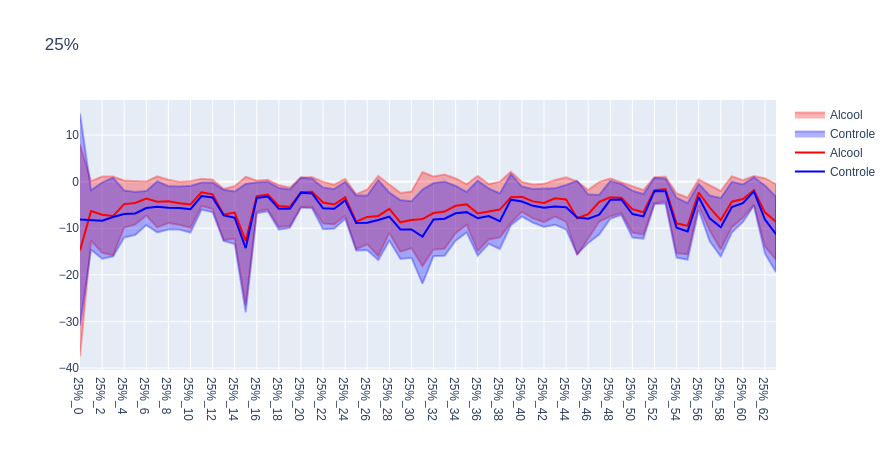

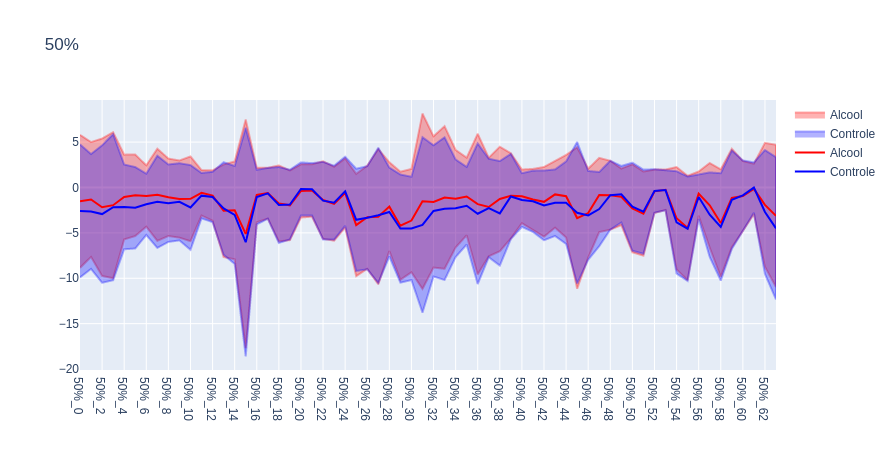

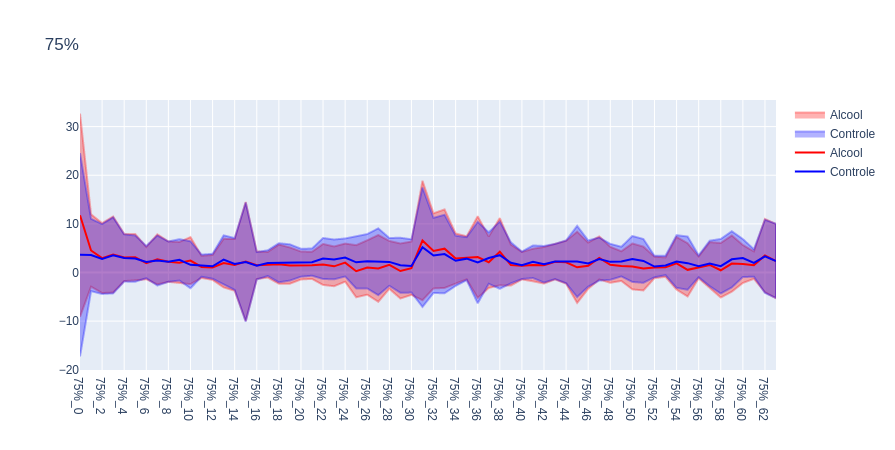

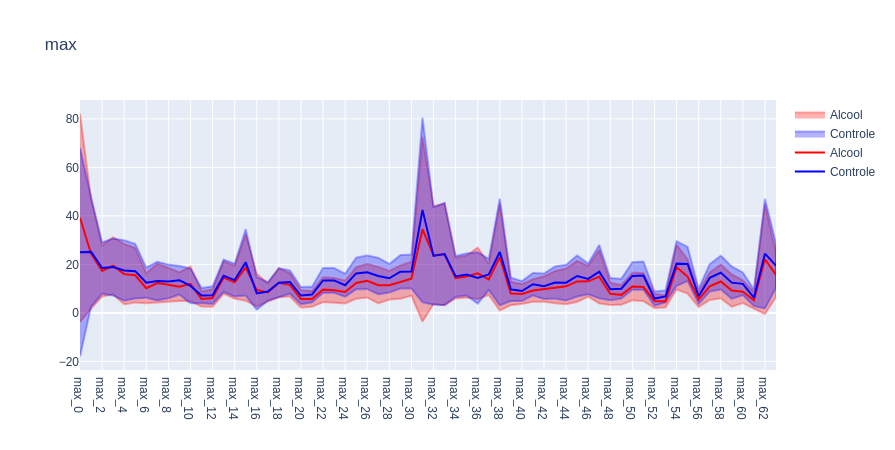

In [9]:
for base in columns:
    ary1=alcool[[base+str(idx) for idx in range(0, 64)]]
    ary2=control[[base+str(idx) for idx in range(0, 64)]]

    plote(ary1, ary2, base.split('_')[0])

In [30]:
X = EEG_data.drop('type', axis=1)
y = EEG_data.type

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.6,
                                                    random_state=52)

X_train.shape,X_test.shape, y_train.shape, y_test.shape

((379, 449), (569, 449), (379,), (569,))

/home/jupiter/.pyenv/versions/3.8.5/envs/proc/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Logistic Regression
              precision    recall  f1-score   support

           a       0.93      0.89      0.91       284
           c       0.89      0.93      0.91       285

    accuracy                           0.91       569
   macro avg       0.91      0.91      0.91       569
weighted avg       0.91      0.91      0.91       569



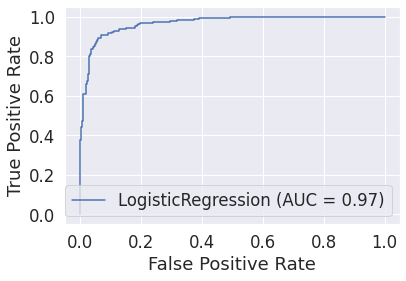

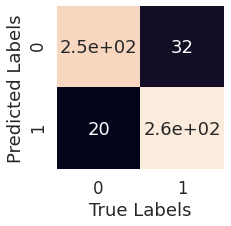

Knn
              precision    recall  f1-score   support

           a       0.74      0.86      0.80       284
           c       0.83      0.71      0.76       285

    accuracy                           0.78       569
   macro avg       0.79      0.78      0.78       569
weighted avg       0.79      0.78      0.78       569



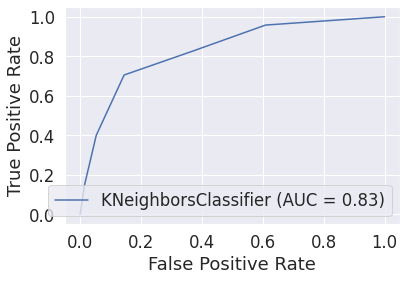

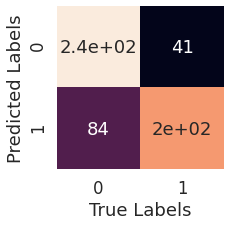

Random Forest Classifier
              precision    recall  f1-score   support

           a       0.83      0.77      0.80       284
           c       0.79      0.84      0.81       285

    accuracy                           0.81       569
   macro avg       0.81      0.81      0.81       569
weighted avg       0.81      0.81      0.81       569



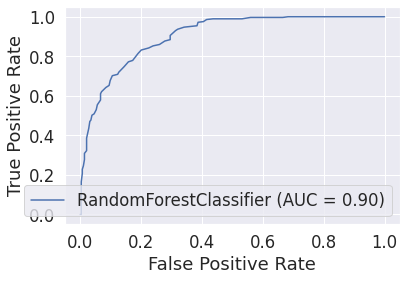

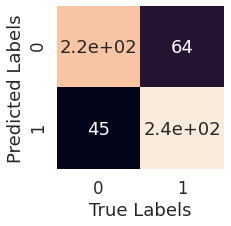

/home/jupiter/.pyenv/versions/3.8.5/envs/proc/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Linear Svc
              precision    recall  f1-score   support

           a       0.92      0.90      0.91       284
           c       0.91      0.92      0.91       285

    accuracy                           0.91       569
   macro avg       0.91      0.91      0.91       569
weighted avg       0.91      0.91      0.91       569



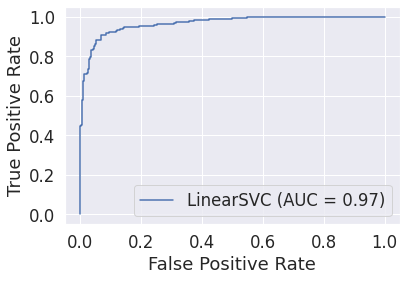

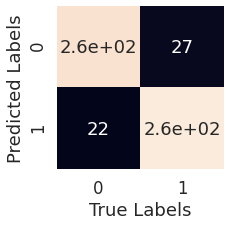

Svc
              precision    recall  f1-score   support

           a       0.82      0.80      0.81       284
           c       0.81      0.83      0.82       285

    accuracy                           0.82       569
   macro avg       0.82      0.82      0.82       569
weighted avg       0.82      0.82      0.82       569



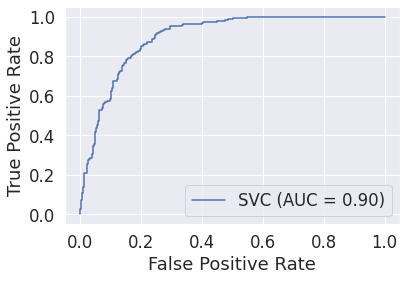

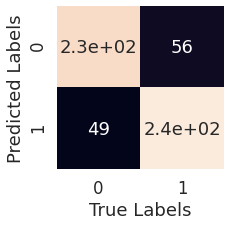

In [31]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
model_compare = pd.DataFrame(model_scores, index=['accuracy'])



{'Logistic Regression': 0.9086115992970123,
 'KNN': 0.7803163444639719,
 'Random Forest Classifier': 0.8084358523725835,
 'Linear SVC': 0.9138840070298769,
 'SVC': 0.8154657293497364}

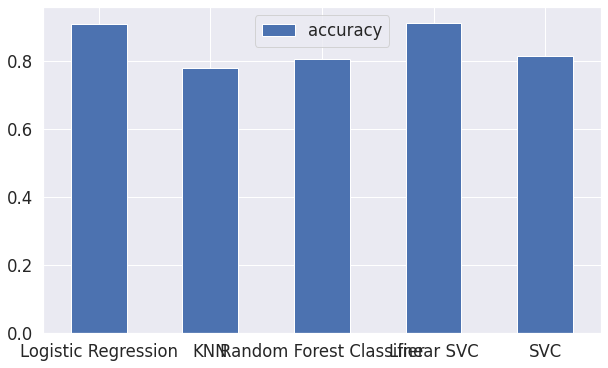

In [32]:
model_compare.T.plot.bar(figsize=(10, 6), rot=0);
model_scores

In [53]:
pca = PCA(5)

In [54]:
X_train_pca=pca.fit_transform(X_train)
X_test_pca=pca.transform(X_test)

In [55]:
X_train.shape, X_train_pca.shape

((379, 449), (379, 5))

Logistic Regression
              precision    recall  f1-score   support

           a       0.73      0.73      0.73       284
           c       0.73      0.74      0.73       285

    accuracy                           0.73       569
   macro avg       0.73      0.73      0.73       569
weighted avg       0.73      0.73      0.73       569



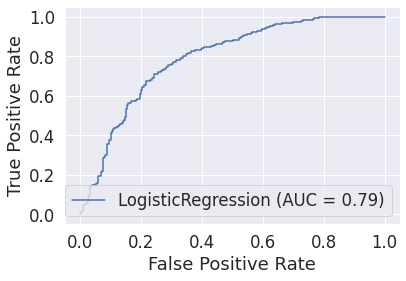

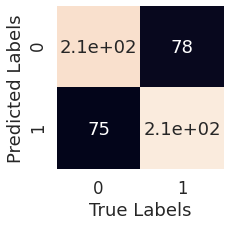

Knn
              precision    recall  f1-score   support

           a       0.68      0.62      0.65       284
           c       0.65      0.71      0.68       285

    accuracy                           0.66       569
   macro avg       0.67      0.66      0.66       569
weighted avg       0.67      0.66      0.66       569



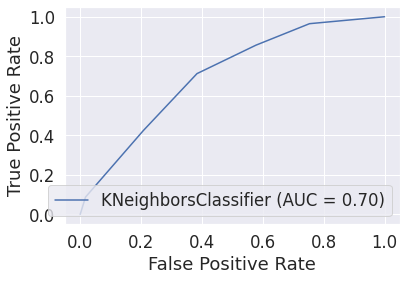

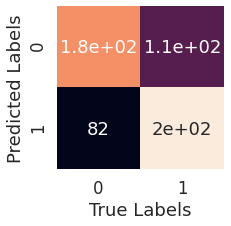

Random Forest Classifier
              precision    recall  f1-score   support

           a       0.72      0.68      0.70       284
           c       0.70      0.74      0.72       285

    accuracy                           0.71       569
   macro avg       0.71      0.71      0.71       569
weighted avg       0.71      0.71      0.71       569



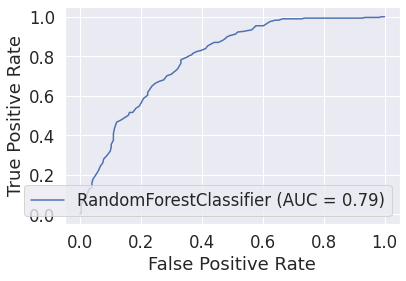

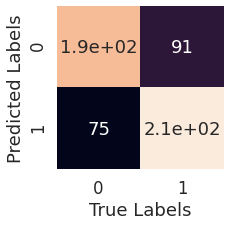

/home/jupiter/.pyenv/versions/3.8.5/envs/proc/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Linear Svc
              precision    recall  f1-score   support

           a       0.71      0.61      0.66       284
           c       0.66      0.76      0.70       285

    accuracy                           0.68       569
   macro avg       0.69      0.68      0.68       569
weighted avg       0.69      0.68      0.68       569



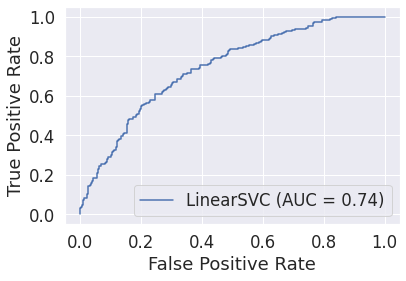

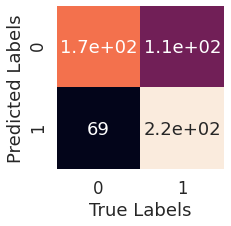

Svc
              precision    recall  f1-score   support

           a       0.77      0.65      0.70       284
           c       0.70      0.80      0.75       285

    accuracy                           0.73       569
   macro avg       0.73      0.73      0.72       569
weighted avg       0.73      0.73      0.72       569



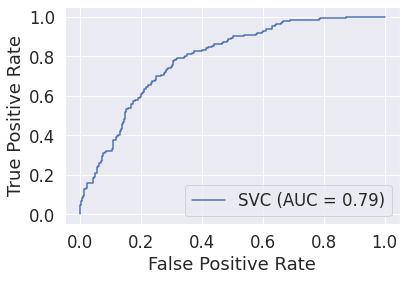

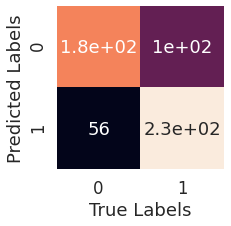

In [56]:
model_scores = fit_and_score(models, X_train_pca, X_test_pca, y_train, y_test)
model_compare = pd.DataFrame(model_scores, index=['accuracy'])



{'Logistic Regression': 0.7311072056239016,
 'KNN': 0.664323374340949,
 'Random Forest Classifier': 0.7082601054481547,
 'Linear SVC': 0.6818980667838312,
 'SVC': 0.7258347978910369}

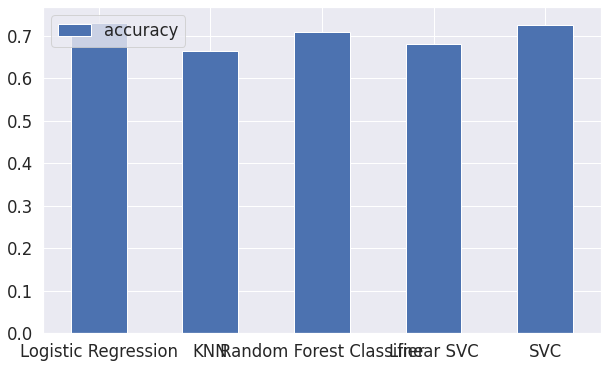

In [57]:
model_compare.T.plot.bar(figsize=(10, 6), rot=0);
model_scores

In [38]:
print(datetime.datetime.now()-start)

0:07:33.095086
